In [1]:
import os
if not os.path.exists('data'):
    new_directory_path = "..\\..\\"
    os.chdir(new_directory_path)
from src.data.transforms import generate_gaussian_heatmaps, get_coords_from_heatmaps
import torch
import matplotlib.pyplot as plt



torch.Size([3, 2])
Output Shape: torch.Size([3, 32, 32])


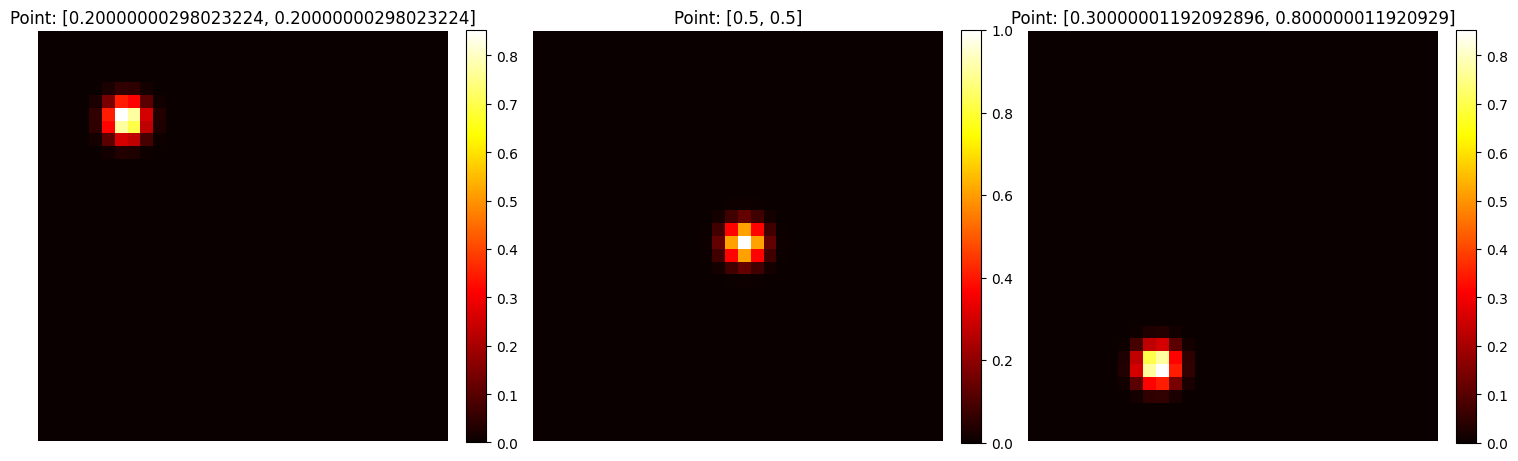

In [2]:


# --- Example Usage ---

# Define settings
H, W = 32, 32
coordinates = torch.tensor([
    [20.0, 20.0],  # Top-leftish
    [50.0, 50.0],  # Center
    [30.0, 80.0]   # Bottom-rightish
])
coordinates = coordinates/100
print(coordinates.shape)
# Generate heatmaps
heatmap_tensor = generate_gaussian_heatmaps(coordinates, (H, W), sigma=1)

print(f"Output Shape: {heatmap_tensor.shape}") # Should be (3, 100, 100)

# --- Visualization (Optional) ---
# If you want to visualize the result

# Fix for shape mismatch (should handle batch/point axis first)
num_points = heatmap_tensor.shape[0]


fig, axes = plt.subplots(1, num_points, figsize=(5 * num_points, 5))
if num_points == 1:
    axes = [axes]
for i in range(num_points):
    im = axes[i].imshow(heatmap_tensor[i].cpu().numpy(), cmap='hot', origin='upper')
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    axes[i].set_title(f"Point: {coordinates[i].tolist()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
predicted_coords = get_coords_from_heatmaps(heatmap_tensor.unsqueeze(0)).squeeze(0)

print("Original Coords:\n", coordinates)
print("\nPredicted Coords (Sub-pixel):\n", predicted_coords)

# Calculate Error
error = (coordinates - predicted_coords).abs().mean()
print(f"\nMean Absolute Error: {error.item():.6f} pixels")

Original Coords:
 tensor([[0.2000, 0.2000],
        [0.5000, 0.5000],
        [0.3000, 0.8000]])

Predicted Coords (Sub-pixel):
 tensor([[0.2000, 0.2000],
        [0.5000, 0.5000],
        [0.3000, 0.8000]])

Mean Absolute Error: 0.000000 pixels
